In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats

In [45]:
data= pd.read_csv('sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')
data=data.drop(columns=['B_DAY'])
print(data.shape)

(535169, 405)


In [46]:
# data=data.query('FIELD_15 !=1 and FIELD_17 !=1 and FIELD_22 != 1 and FIELD_24 != 1 and FIELD_16 != 1 and FIELD_23 != 1 and FIELD_30 != 1')
print(data.shape)

(535169, 405)


In [47]:
df=data.copy()
conditions3 = [
    (df.L100800 < 100)  ,
    (df.L100800 >= 100) & (df.L100800 < 126),
    (df.L100800 >= 126)]
choices3 = [0,1,2]
df['CLASS'] = np.select(conditions3, choices3, default=0)
df.head()
data=df.copy()

In [48]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])
categorical_cols.append('CLASS')

In [58]:
data[data.L100800==0][['Unnamed: 0','FIELD_1','FIELD_2','COMPARE','AGE','SEX','L100800']]

,Unnamed: 0,FIELD_1,FIELD_2,COMPARE,AGE,SEX,L100800
19318,19318,1052984,20130323,105298420130323,49.0,1.0,0.0
73931,73931,1248292,20130328,124829220130328,63.0,0.0,0.0
411156,411156,613296,20130222,61329620130222,35.0,1.0,0.0
455397,455397,772054,20130320,77205420130320,39.0,1.0,0.0


0.0


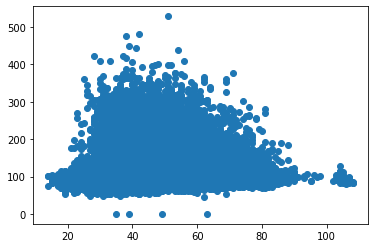

In [55]:
# data.AGE
from matplotlib import pyplot as plt

tempdata=data[['AGE','L100800']].dropna()

print(np.min(tempdata.L100800))

plt.scatter(tempdata.AGE,tempdata.L100800)

Calculate correlation Value - for numerical values
========

In [6]:
corr=data[numerical_cols].corr()

In [7]:
val= pd.DataFrame(corr['L100800']).sort_values(by='L100800', ascending=False)
# val.head(15)

mydataset=data.copy()[numerical_cols]
colslist_original=mydataset.columns
DiabeticColVals_original=mydataset.L100800

cor_original=[]
count_original=[]

for i in range(len(colslist_original)):
    print(i,colslist_original[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals_original
    temp['b']=mydataset[colslist_original[i]]
    temp=temp.dropna()
    count_original.append(temp.shape[0])
    tempcor=temp.corr()
    
    if(tempcor.shape[0]>1):
        print(temp.shape)
        cor_original.append(abs(tempcor.b[0]))
    else:
        cor_original.append(0)
    


0 Unnamed: 0
(456919, 2)
1 COMPARE
(456919, 2)
2 AGE
(456918, 2)
3 SEX
(456918, 2)
4 L100100
(438031, 2)
5 L100200
(438392, 2)
6 L100300
(431246, 2)
7 L100400
(437530, 2)
8 L100500
(456286, 2)
9 L100700
(438910, 2)
10 L100800
(456919, 2)
11 L101000
(443187, 2)
12 L101100
(236608, 2)
13 L101200
(456918, 2)
14 L101300
(456918, 2)
15 L101400
(393827, 2)
16 L101600
(443139, 2)
17 L101700
(456333, 2)
18 L102000
(68683, 2)
19 L102200
(5256, 2)
20 L102400
(297201, 2)
21 L102500
(15295, 2)
22 L102700
(242679, 2)
23 L102800
(686, 2)
24 L102900
(456049, 2)
25 L103000
(455880, 2)
26 L103100
(455163, 2)
27 L103200
(455148, 2)
28 L103300
(389598, 2)
29 L103400
(170341, 2)
30 L103500
(170286, 2)
31 L103600
(164957, 2)
32 L103700
(195903, 2)
33 L103800
(197860, 2)
34 L103900
(7396, 2)
35 L104000
(9004, 2)
36 L104200
(8020, 2)
37 L104300
(254084, 2)
38 L104400
(240332, 2)
39 L104500
(240336, 2)
40 L104600
(158015, 2)
41 L104800
(12, 2)
42 L104900
(15429, 2)
43 L105200
(456194, 2)
44 L105300
(14, 2)
45

In [8]:
CorValWithCorr=pd.DataFrame()    
CorValWithCorr['Cols']=colslist_original
CorValWithCorr['Corr']=cor_original
CorValWithCorr['Count']=count_original
CorValWithCorr=CorValWithCorr.sort_values(by='Corr', ascending=False)

CorValWithCorr.head(15)

,Cols,Corr,Count
148,L501600,1.000000,2
178,L518900,1.000000,2
10,L100800,1.000000,456919
59,L117700,1.000000,2
63,L120600,1.000000,2
159,L503200,1.000000,2
275,CLASS,0.740571,456919
147,L500900,0.720241,7
152,L502000,0.688901,4
184,L550300,0.686986,4


In [9]:
CorValWithCorr2=CorValWithCorr.copy()
CorValWithCorr2=CorValWithCorr2[CorValWithCorr2.Count>100000].sort_values(by='Corr', ascending=False)
CorValWithCorr2=CorValWithCorr2.reset_index().drop(columns = ['index'])

print(list(CorValWithCorr2.head(40).Cols))
CorValWithCorr2.head(32)

['L100800', 'CLASS', 'L104600', 'L103000', 'S000300', 'L103300', 'S000501', 'S000502', 'L101700', 'SEX', 'L190400', 'L190500', 'AGE', 'L190300', 'L102900', 'L101300', 'L103100', 'L100700', 'L101600', 'S000100', 'L100500', 'S010102', 'S010101', 'L504700', 'L190800', 'L103800', 'L100400', 'L500800', 'L103500', 'L100100', 'L103200', 'L101200', 'L190700', 'L103600', 'L100200', 'L102400', 'L190000', 'L103700', 'L100300', 'L103400']


,Cols,Corr,Count
0,L100800,1.000000,456919
1,CLASS,0.740571,456919
2,L104600,0.670802,158015
3,L103000,0.363775,455880
4,S000300,0.283489,455771
5,L103300,0.278154,389598
6,S000501,0.272010,456762
7,S000502,0.250502,456762
8,L101700,0.240470,456333
9,SEX,0.233634,456918


Anova test - For categorical values [Questionnaire answers]
=======

In [35]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]

# mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
#                            'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
#                            'FIELD_103','FIELD_106'])

mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_87','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39',
                                  'FIELD_88','FIELD_89', 'FIELD_108','FIELD_109','FIELD_110','FIELD_111' ])


mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [36]:
colslist=mydataset.columns
DiabeticColVals=data.L100800

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(abs(F))
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_6
4 FIELD_7
5 FIELD_9
6 FIELD_13
7 FIELD_14
8 FIELD_15
9 FIELD_16
10 FIELD_17
11 FIELD_18
12 FIELD_19
13 FIELD_20
14 FIELD_21
15 FIELD_22
16 FIELD_23
17 FIELD_24
18 FIELD_25
19 FIELD_26
20 FIELD_27
21 FIELD_28
22 FIELD_29
23 FIELD_30
24 FIELD_31
25 FIELD_32
26 FIELD_33
27 FIELD_34
28 FIELD_35
29 FIELD_36
30 FIELD_37
31 FIELD_38
32 FIELD_40
33 FIELD_41
34 FIELD_42
35 FIELD_43
36 FIELD_44
37 FIELD_45
38 FIELD_46
39 FIELD_47
40 FIELD_48
41 FIELD_49
42 FIELD_50
43 FIELD_51
44 FIELD_52
45 FIELD_53
46 FIELD_54
47 FIELD_55
48 FIELD_56
49 FIELD_57
50 FIELD_58
51 FIELD_59
52 FIELD_60
53 FIELD_61
54 FIELD_62
55 FIELD_63
56 FIELD_64
57 FIELD_65
58 FIELD_66
59 FIELD_67
60 FIELD_68
61 FIELD_69
62 FIELD_70
63 FIELD_72
64 FIELD_73
65 FIELD_74
66 FIELD_75
67 FIELD_76
68 FIELD_77
69 FIELD_80
70 FIELD_81
71 FIELD_82
72 FIELD_84
73 FIELD_85
74 FIELD_90
75 FIELD_91
76 FIELD_93
77 FIELD_94
78 FIELD_95
79 FIELD_96
80 FIELD_97
81 FIELD_98
82 FIELD_101
83 FIELD_102
84 FIE

In [37]:

FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [38]:
FvalPvalCorr[FvalPvalCorr.Count>200000].head(30)

,Cols,F,P,Count
116,CLASS,385585.757384,0.000000e+00,456905
26,FIELD_33,2070.117413,0.000000e+00,454652
31,FIELD_38,892.251367,0.000000e+00,424264
24,FIELD_31,460.335976,1.910148e-200,453996
14,FIELD_21,188.932117,5.547795e-43,450551
32,FIELD_40,159.543512,0.000000e+00,424335
20,FIELD_27,157.563402,3.934106e-69,453541
7,FIELD_14,88.262851,4.735361e-39,455727
33,FIELD_41,86.314675,1.037286e-143,424263
22,FIELD_29,22.553092,1.606213e-10,454050


In [39]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>200000].Cols)[:30])

['CLASS', 'FIELD_33', 'FIELD_38', 'FIELD_31', 'FIELD_21', 'FIELD_40', 'FIELD_27', 'FIELD_14', 'FIELD_41', 'FIELD_29', 'FIELD_20', 'FIELD_32', 'FIELD_4', 'FIELD_28', 'FIELD_25', 'FIELD_42', 'FIELD_13', 'FIELD_19', 'FIELD_18', 'FIELD_3', 'FIELD_26', 'FIELD_15', 'FIELD_16', 'FIELD_17', 'FIELD_22', 'FIELD_23', 'FIELD_24']


correlation for categorical values
============

In [15]:
mydata=data.copy()[categorical_cols]

mydata=mydata.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
                           'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
                           'FIELD_103','FIELD_106'])
# FIELD_39 ?
mydata=mydata.drop(mydata[mydata.FIELD_3=='`'].index)
mydata=mydata.drop(mydata[mydata.FIELD_3=='G'].index)


mydata=mydata.drop(mydata[mydata.FIELD_4=='.'].index)
mydata=mydata.drop(mydata[mydata.FIELD_5=='.'].index)

mydata=mydata.drop(mydata[mydata.FIELD_35=='?'].index)
mydata=mydata.drop(mydata[mydata.FIELD_35=='.'].index)
mydata=mydata.drop(mydata[mydata.FIELD_36=='.'].index)
mydata=mydata.drop(mydata[mydata.FIELD_37=='\\'].index)
 
# mydata=mydata.drop(mydata[mydata.FIELD_39 == '7+' ].index)
# mydata=mydata.drop(mydata[mydata.FIELD_39 == '5~7'].index)
# mydata=mydata.drop(mydata[mydata.FIELD_39 == '3-4'].index)


mydata=mydata.drop(mydata[mydata.FIELD_95=='.'].index)

In [16]:
AllTables=[]
for j in range(len(mydata.columns)):
    
    
    columnName = mydata.columns[j]
    print(j,columnName)
    
    temp=mydata[columnName].dropna().astype(float).unique() 
    mytempdata=mydata[[columnName,'CLASS']].dropna()
    mytempdata[columnName]=mytempdata[columnName].astype(float)
    temptable=[]
    
    sumval=0

    for i in range(temp.shape[0]):
        
        temp_i_val=str(temp[i])
        class0_count = mytempdata.query(columnName + ' == '+( temp_i_val ) + ' & CLASS == 0' ).shape[0]
        class1_count = mytempdata.query(columnName + ' == '+( temp_i_val ) + ' & CLASS == 1' ).shape[0]
        class2_count = mytempdata.query(columnName + ' == '+( temp_i_val ) + ' & CLASS == 2' ).shape[0]
        
        sumval = sumval + (class0_count+class1_count+class2_count)

        temptable.append(
        [
            class0_count,class1_count,class2_count
        ])
    
    print(sumval,mytempdata.shape[0], mytempdata.shape[0] == sumval)
    
    if(len(temptable) > 1):
        AllTables.append([temptable , columnName , mytempdata.shape[0] ] )
        print(mydata.columns[j])



0 FIELD_3
251201 251201 True
FIELD_3
1 FIELD_4
446905 446905 True
FIELD_4
2 FIELD_5
143531 143531 True
FIELD_5
3 FIELD_6
171254 171254 True
FIELD_6
4 FIELD_7
199760 199760 True
FIELD_7
5 FIELD_9
36705 36705 True
FIELD_9
6 FIELD_13
456239 456239 True
FIELD_13
7 FIELD_14
456266 456266 True
FIELD_14
8 FIELD_15
456253 456253 True
9 FIELD_16
456284 456284 True
10 FIELD_17
456288 456288 True
11 FIELD_18
456130 456130 True
FIELD_18
12 FIELD_19
456338 456338 True
FIELD_19
13 FIELD_20
451062 451062 True
FIELD_20
14 FIELD_21
451086 451086 True
FIELD_21
15 FIELD_22
451097 451097 True
16 FIELD_23
451090 451090 True
17 FIELD_24
449646 449646 True
18 FIELD_25
451079 451079 True
FIELD_25
19 FIELD_26
451225 451225 True
FIELD_26
20 FIELD_27
454077 454077 True
FIELD_27
21 FIELD_28
453980 453980 True
FIELD_28
22 FIELD_29
454588 454588 True
FIELD_29
23 FIELD_30
68636 68636 True
24 FIELD_31
454534 454534 True
FIELD_31
25 FIELD_32
454766 454766 True
FIELD_32
26 FIELD_33
455181 455181 True
FIELD_33
27 FIELD_

In [17]:
AllTables

[[[[177287, 57088, 3503],
   [9569, 3439, 204],
   [31, 7, 0],
   [11, 3, 0],
   [38, 8, 0],
   [9, 3, 0],
   [0, 1, 0]],
  'FIELD_3',
  251201],
 [[[89601, 29240, 1889],
   [109214, 37857, 2413],
   [89057, 29568, 1918],
   [4675, 1568, 138],
   [36388, 12467, 894],
   [5, 2, 0],
   [7, 2, 0],
   [1, 1, 0]],
  'FIELD_4',
  446905],
 [[[33420, 12102, 931],
   [8027, 2537, 165],
   [62141, 19335, 1170],
   [2651, 962, 58],
   [11, 2, 0],
   [8, 2, 0],
   [7, 1, 0],
   [1, 0, 0]],
  'FIELD_5',
  143531],
 [[[100747, 21972, 1110],
   [42741, 4474, 160],
   [26, 5, 1],
   [9, 2, 0],
   [3, 2, 0],
   [2, 0, 0]],
  'FIELD_6',
  171254],
 [[[138794, 17966, 734],
   [30587, 10969, 676],
   [19, 5, 0],
   [3, 4, 0],
   [2, 0, 0],
   [1, 0, 0]],
  'FIELD_7',
  199760],
 [[[1080, 140, 5], [21162, 8499, 508], [3824, 1394, 93]], 'FIELD_9', 36705],
 [[[335900, 112154, 7402], [496, 222, 16], [41, 8, 0]], 'FIELD_13', 456239],
 [[[334876, 111578, 7337], [1579, 805, 88], [3, 0, 0]], 'FIELD_14', 456266],

In [18]:
statas=[]
for i in range(len(AllTables)):
    print(i,AllTables[i][1])
    table=AllTables[i][0]
    stat, p, dof, expected = chi2_contingency(table)
    statas.append([AllTables[i][1],stat, p, dof, np.sum(table) , AllTables[i][2] ,AllTables[i][1], table, expected ])
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_6
4 FIELD_7
5 FIELD_9
6 FIELD_13
7 FIELD_14
8 FIELD_18
9 FIELD_19
10 FIELD_20
11 FIELD_21
12 FIELD_25
13 FIELD_26
14 FIELD_27
15 FIELD_28
16 FIELD_29
17 FIELD_31
18 FIELD_32
19 FIELD_33
20 FIELD_34
21 FIELD_35
22 FIELD_36
23 FIELD_37
24 FIELD_38
25 FIELD_40
26 FIELD_41
27 FIELD_42
28 FIELD_43
29 FIELD_44
30 FIELD_45
31 FIELD_46
32 FIELD_47
33 FIELD_48
34 FIELD_49
35 FIELD_50
36 FIELD_51
37 FIELD_52
38 FIELD_53
39 FIELD_54
40 FIELD_55
41 FIELD_56
42 FIELD_57
43 FIELD_58
44 FIELD_59
45 FIELD_60
46 FIELD_61
47 FIELD_62
48 FIELD_63
49 FIELD_64
50 FIELD_65
51 FIELD_66
52 FIELD_67
53 FIELD_68
54 FIELD_69
55 FIELD_72
56 FIELD_73
57 FIELD_74
58 FIELD_75
59 FIELD_76
60 FIELD_77
61 FIELD_80
62 FIELD_81
63 FIELD_84
64 FIELD_90
65 FIELD_93
66 FIELD_94
67 FIELD_95
68 FIELD_96
69 FIELD_97
70 FIELD_98
71 FIELD_101
72 FIELD_102
73 FIELD_105
74 FIELD_112
75 FIELD_113
76 FIELD_114
77 FIELD_115
78 FIELD_116
79 FIELD_117
80 FIELD_118
81 FIELD_119
82 FIELD_120
83 FIELD

In [19]:
finalstat=pd.DataFrame( statas ,columns=['Name','stat','p','dof','instances','orginal','Name2', 'table', 'expected'] )
finalstat=finalstat[finalstat.orginal>200000]
finalstat.stat=finalstat.stat.astype(int)
print(finalstat.sort_values(by='stat',ascending=False).shape)
print(list(finalstat.sort_values(by='stat',ascending=False).Name))
finalstat.sort_values(by='stat',ascending=False)
finalstat.sort_values(by='stat',ascending=False)[['Name','stat', 'instances',]].head(20)

(21, 9)
['CLASS', 'FIELD_33', 'FIELD_38', 'FIELD_40', 'FIELD_31', 'FIELD_41', 'FIELD_27', 'FIELD_21', 'FIELD_14', 'FIELD_42', 'FIELD_32', 'FIELD_4', 'FIELD_29', 'FIELD_3', 'FIELD_19', 'FIELD_28', 'FIELD_13', 'FIELD_20', 'FIELD_26', 'FIELD_25', 'FIELD_18']


,Name,stat,instances
103,CLASS,914890,457445
19,FIELD_33,13884,455181
24,FIELD_38,9482,424774
25,FIELD_40,1684,424845
17,FIELD_31,992,454534
26,FIELD_41,815,424773
14,FIELD_27,364,454077
11,FIELD_21,180,451086
7,FIELD_14,154,456266
27,FIELD_42,141,424729


In [20]:
AllTables[i]

[[[0, 112783, 0], [337211, 0, 0], [0, 0, 7451]], 'CLASS', 457445]

In [21]:
mydata.FIELD_73.unique()

array([     nan, 2.00e+00, 1.00e+00, 5.00e+00, 3.00e+00, 7.00e+00,
       1.00e+03, 1.00e+01, 4.00e+00, 0.00e+00, 3.00e+02, 5.00e+02,
       1.20e+03, 2.20e+01, 1.11e+02, 2.00e+02, 1.10e+02, 6.00e+00,
       2.00e+01, 1.10e+01, 8.00e+00, 3.00e+03, 1.50e+03, 3.40e+01,
       5.55e+02, 3.50e+02, 1.20e+01, 5.50e+01, 2.00e+03, 6.00e+02])